<a href="https://colab.research.google.com/github/bvsvarshini/Tomato-Leaves-Image-Generation-using-DCGAN/blob/main/earlyblight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import requirement libraries and tools
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/early.zip'
# Directory where the zip will be extracted
extraction_path = '/content/early/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Verify extraction
print("Files extracted:")
print(os.listdir(extraction_path))


Files extracted:
['early']


In [ ]:
data_dir = extraction_path

# Example: List files in the data_dir
import os
print(os.listdir(data_dir))


['early']


In [ ]:
img_width, img_height = 256, 256
batchsize = 32

train = keras. utils.image_dataset_from_directory(
    directory='early',
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 1616 files belonging to 1 classes.


In [ ]:
import tensorflow as tf

# Define the path to the extracted images
data_dir = extraction_path

# Load the dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_width, img_height),
    batch_size=batchsize,
    label_mode=None  # or 'int'/'categorical' depending on your labels
)


Found 1616 files.


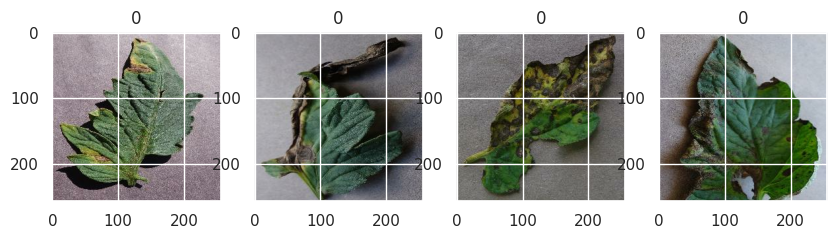

In [ ]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Generating Augmented Batches of Images using ImageDataGenerator
DIR = 'early' #path

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

#train_generator[0]

Found 1616 images belonging to 1 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32768)               │       9,863,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 256)         │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 3)           │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,619,203 (48.14 MB)

 Trainable params: 12,619,203 (48.14 MB)

 Non-trainable params: 0 (0.00 B)

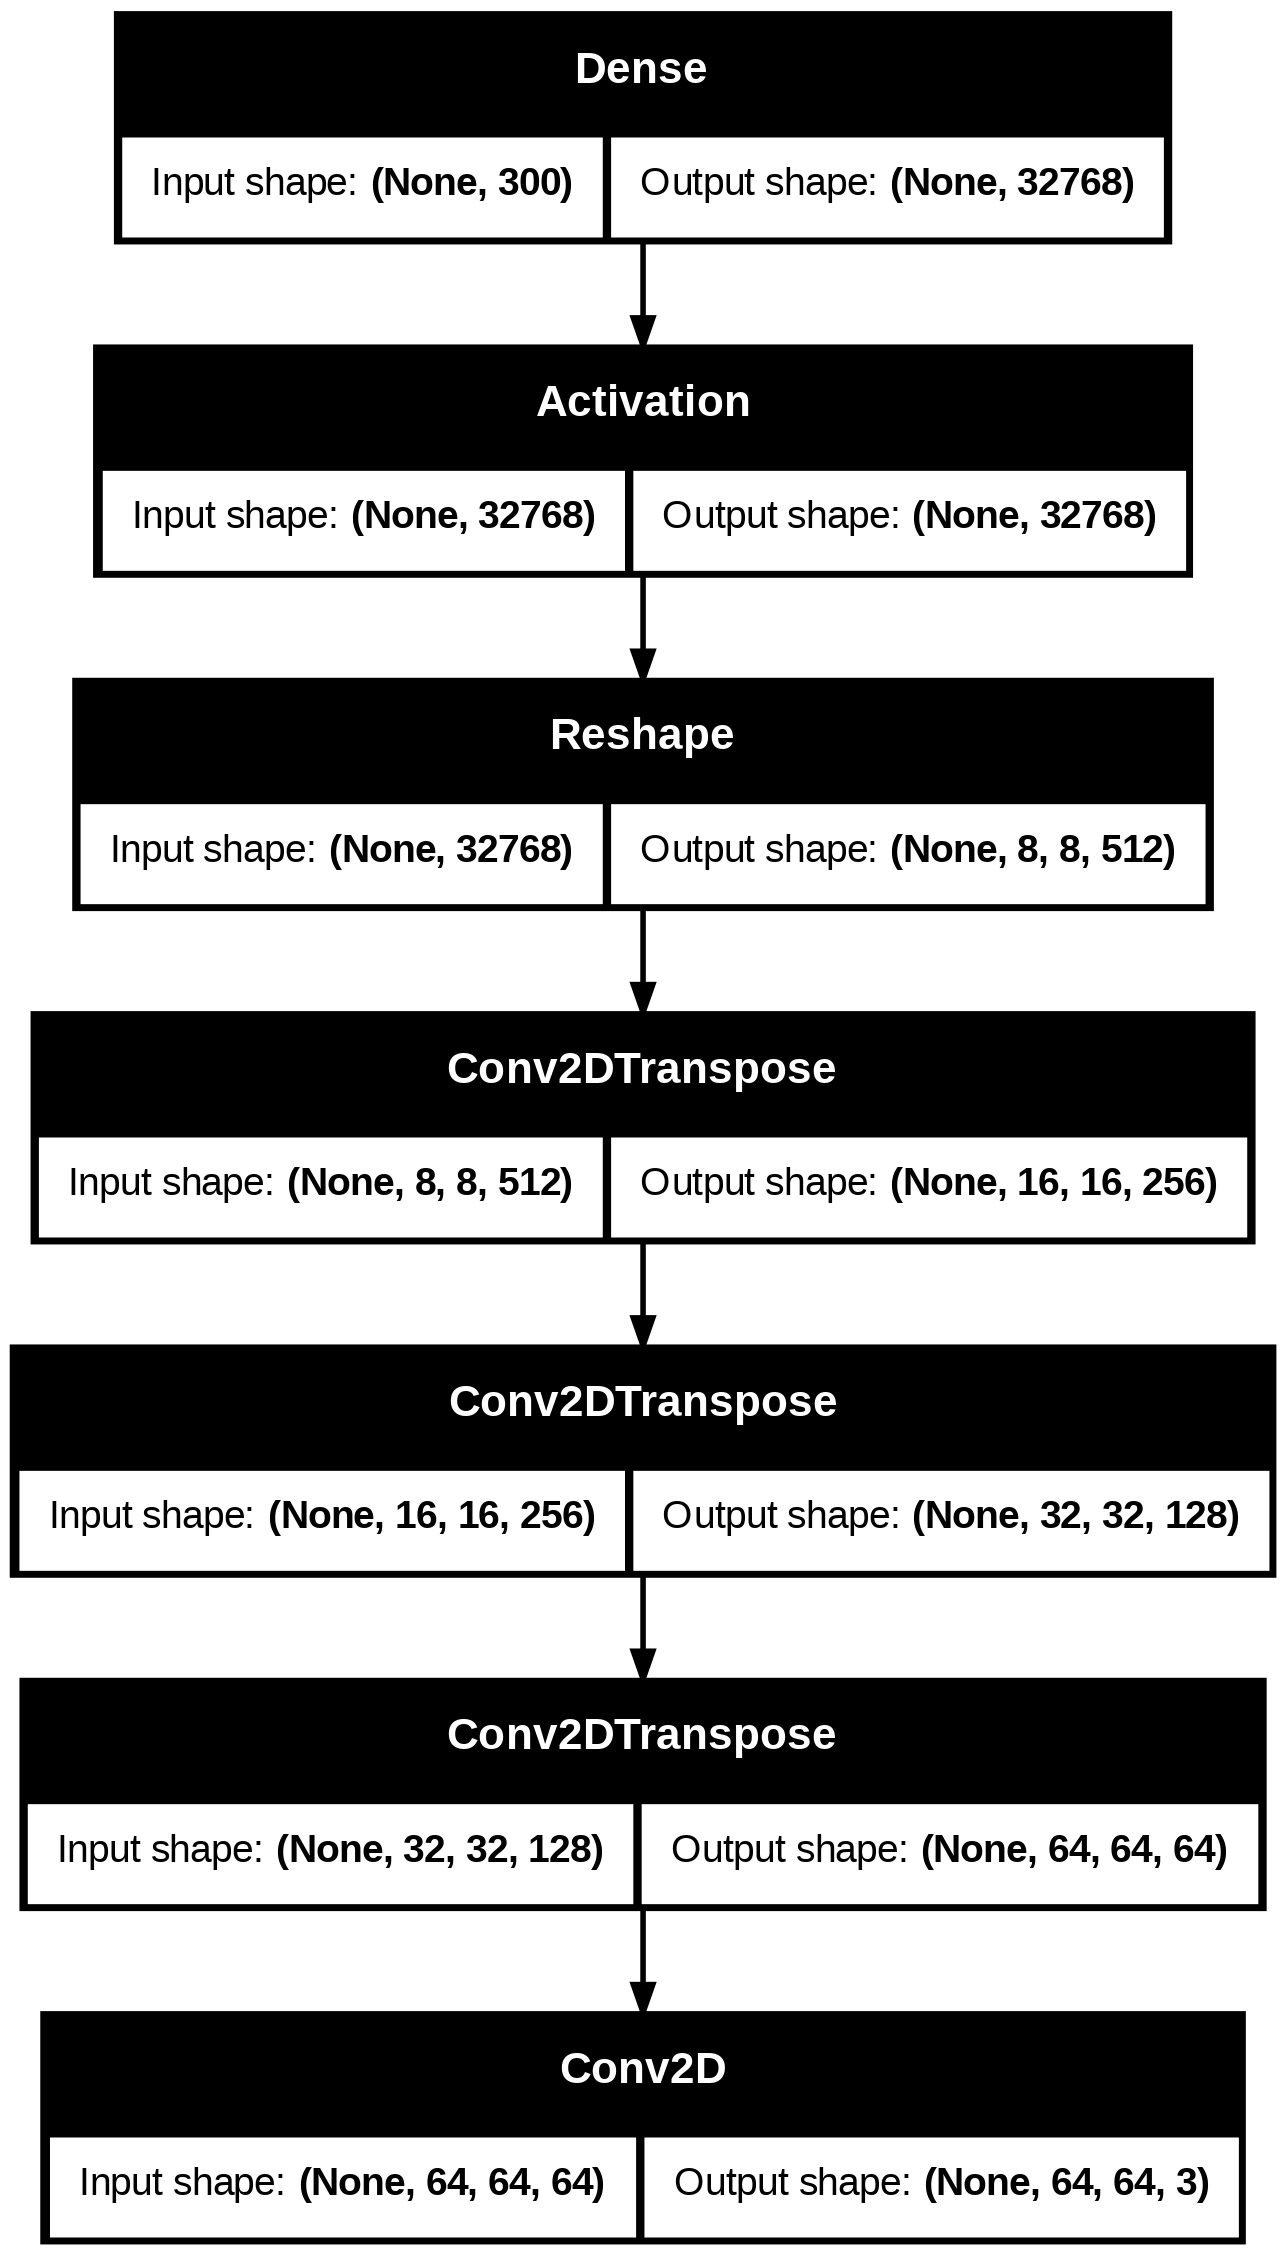

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose, Dense, Reshape
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 300

def Generator_Model():
    Generator = Sequential()

    # Random noise
    Generator.add(Dense(8 * 8 * 512, input_dim=input_dim))
    Generator.add(keras.layers.Activation('relu'))  # Use 'relu' as a string
    # Convert 1D to 3D
    Generator.add(Reshape((8, 8, 512)))
    # Upsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))

    return Generator

generator = Generator_Model()
generator.summary()
# Visualize Layers of generator
keras.utils.plot_model(generator, show_shapes=True)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,730,625 (10.42 MB)

 Trainable params: 2,730,625 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

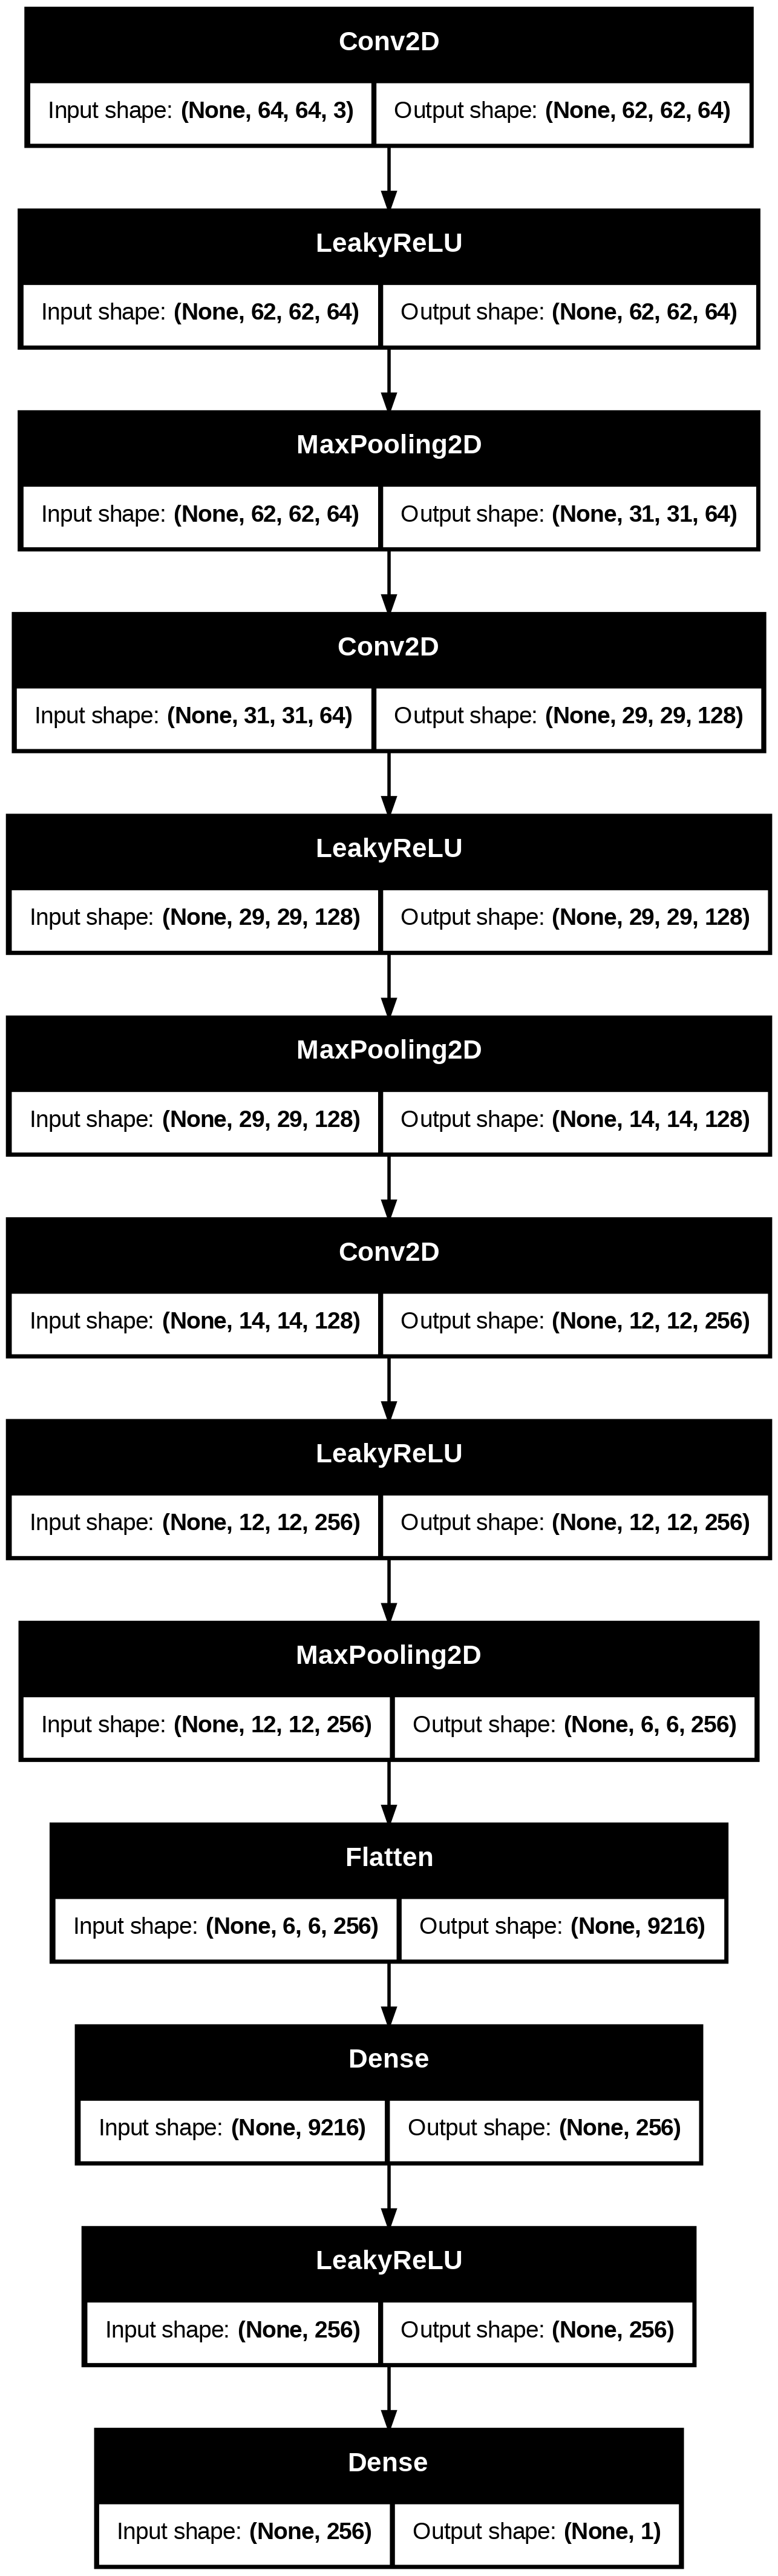

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.models import Sequential

def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape))
    discriminator.add(LeakyReLU(alpha=0.2))  # Use LeakyReLU with an alpha parameter
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(128, kernel_size=(3, 3)))
    discriminator.add(LeakyReLU(alpha=0.2))  # Use LeakyReLU with an alpha parameter
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(256, kernel_size=(3, 3)))
    discriminator.add(LeakyReLU(alpha=0.2))  # Use LeakyReLU with an alpha parameter
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Flatten())
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(alpha=0.2))  # Use LeakyReLU with an alpha parameter
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

# Training The CNN
discriminator = Discriminator_Model()
discriminator.summary()
# Visualize Layers of discriminator
import tensorflow.keras as keras
keras.utils.plot_model(discriminator, show_shapes=True)


In [ ]:
# DCGAN Model Training Step with Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')

    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # train the discriminator with real (1) and fake (0) images
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)

            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)

            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2
        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))


        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)

        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))

        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

In [ ]:
import os

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # Create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])
        # Create a directory to save generated images if it doesn't exist
        if not os.path.exists('generated_images'):
            os.makedirs('generated_images')

    def on_epoch_end(self, epoch, logs=None):
        # Generate the image from noise
        g_img = self.model.generator(self.noise)
        # Denormalize the image
        g_img = (g_img * 255).numpy().astype(np.uint8)

        for i in range(g_img.shape[0]):
            # Convert generated images to PIL Image format
            img = Image.fromarray(g_img[i])
            # Save the image to the local folder
            img.save(f'generated_images/image_epoch_{epoch+1}_img_{i+1}.png')

    def on_train_end(self, logs=None):
        self.model.generator.save('DCGEN.h5')


In [ ]:
# Training DCGAN on Image Dataset for 40 Epochs

epochs = 200
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 300

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# Fit the model and save the history
history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor()])

Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - d_loss: 0.6037 - g_loss: 1.3110
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - d_loss: 0.7831 - g_loss: 1.6058
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - d_loss: 0.3432 - g_loss: 1.8101
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - d_loss: 0.3567 - g_loss: 1.9203
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - d_loss: 0.5240 - g_loss: 1.9197
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - d_loss: 0.3339 - g_loss: 1.9976
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - d_loss: 0.5862 - g_loss: 1.6022
Epoch 8/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - d_loss: 0.4710 - g_loss: 1.4626
Epoch 9/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - d_loss: 0.4454 - g_loss: 1.7481
Epoch 10/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - d_loss: 0.3593 - g_loss: 1.7524
Epoch 11/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - d_loss: 0.3370 - g_loss: 2.7899
Epoch 12/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/st

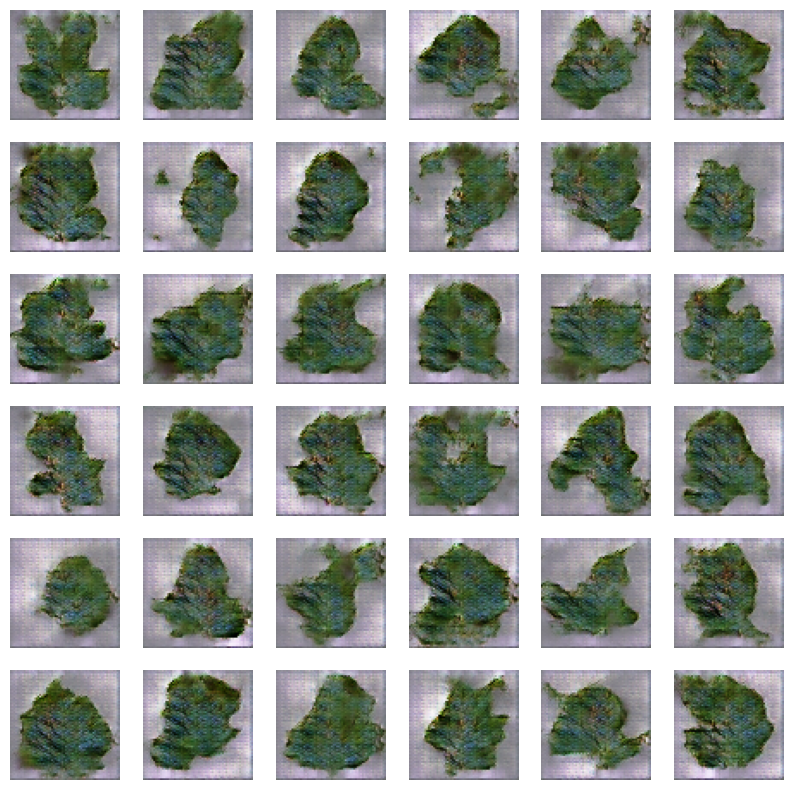

In [ ]:
import os

plt.figure(figsize=(10, 10))

# Create a directory to save generated images if it doesn't exist
if not os.path.exists('generated_images'):
    os.makedirs('generated_images')

for i in range(36):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 300])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255).numpy().astype(np.uint8)

    image = Image.fromarray(mg[0])
    # Save the image to the local folder
    image.save(f'generated_images/image_{i+1}.png')

    plt.imshow(image)
    plt.axis('off')

plt.show()


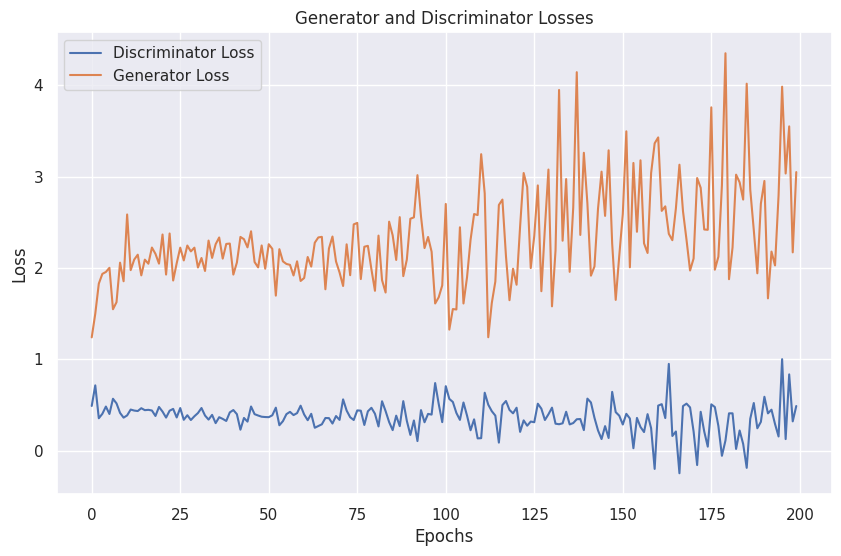

In [ ]:
import matplotlib.pyplot as plt

# Function to create a figure for the losses
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# Call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)

In [ ]:
!zip -r generated_images.zip generated_images/
from google.colab import files
files.download('generated_images.zip')


Streaming output truncated to the last 5000 lines.
  adding: generated_images/image_epoch_5_img_11.png (stored 0%)
  adding: generated_images/image_epoch_176_img_5.png (stored 0%)
  adding: generated_images/image_27.png (stored 0%)
  adding: generated_images/image_epoch_121_img_25.png (stored 0%)
  adding: generated_images/image_epoch_87_img_9.png (stored 0%)
  adding: generated_images/image_epoch_154_img_22.png (stored 0%)
  adding: generated_images/image_epoch_61_img_23.png (stored 0%)
  adding: generated_images/image_epoch_108_img_6.png (stored 0%)
  adding: generated_images/image_epoch_76_img_12.png (stored 0%)
  adding: generated_images/image_epoch_60_img_23.png (stored 0%)
  adding: generated_images/image_epoch_187_img_23.png (stored 0%)
  adding: generated_images/image_epoch_28_img_5.png (stored 0%)
  adding: generated_images/image_epoch_62_img_14.png (stored 0%)
  adding: generated_images/image_epoch_55_img_19.png (stored 0%)
  adding: generated_images/image_epoch_136_img_12.pn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>